In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import math
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout, GRU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import regularizers
import h5py

2023-05-09 18:22:53.826953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/tmp/ipykernel_192515/500687120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wdst_p1['month'] = pd.DatetimeIndex(df_wdst_p1['Fiscal YearMonth']).month


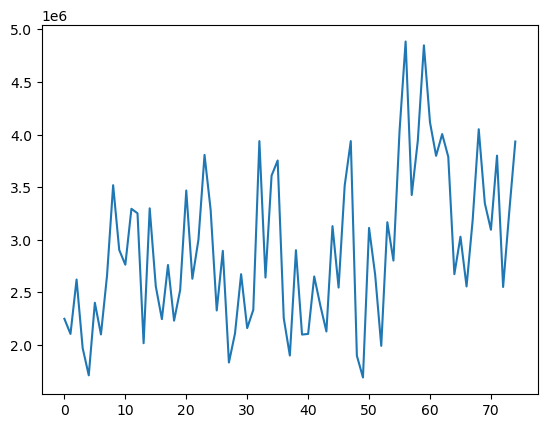

In [2]:
df_wdst_p1_fl=pd.read_excel('/home/anuj/Documents/ANUJ_Project/WOODSTEAM_2nd_Phase/DATA_FILES/RDT_Delta_Data.xlsx')
df_wdst_p1 = df_wdst_p1_fl.loc[:74,:]
df_wdst_p1['NIS Units'].plot(kind = 'line')
time = df_wdst_p1['Fiscal YearMonth'].values
dlt_a = np.array(df_wdst_p1['delta'])
df_wdst_p1['month'] = pd.DatetimeIndex(df_wdst_p1['Fiscal YearMonth']).month
mnth = df_wdst_p1['month'].values
mnth = np.array(mnth)

In [3]:
NIS = np.array(df_wdst_p1['NIS Units'])
# NIS = NIS.reshape( NIS.shape + (1,))
# scaler = MinMaxScaler().fit(NIS)
# NIS = scaler.transform(NIS)
# NIS = np.reshape(NIS,(np.shape(NIS)[0]))
dataset_x = []
a = 0
ws = 12
r = len(NIS)-ws
for i in range(r):
    total = []
    
    for j in range(ws):
        empty = []
        empty.append(NIS[j+a])
        empty.append(int(dlt_a[j+a]))
        empty.append(int(mnth[j+a]))
        total.append(empty)
    dataset_x.append(total)
    a = a+1
(dataset_x)

[[[2250054.0, -143830, 1],
  [2106224.0, 516817, 2],
  [2623041.0, -651839, 3],
  [1971202.0, -258210, 4],
  [1712992.0, 689255, 5],
  [2402247.0, -300698, 6],
  [2101549.0, 560601, 7],
  [2662150.0, 857102, 8],
  [3519252.0, -615369, 9],
  [2903883.0, -139869, 10],
  [2764014.0, 530866, 11],
  [3294880.0, -42553, 12]],
 [[2106224.0, 516817, 2],
  [2623041.0, -651839, 3],
  [1971202.0, -258210, 4],
  [1712992.0, 689255, 5],
  [2402247.0, -300698, 6],
  [2101549.0, 560601, 7],
  [2662150.0, 857102, 8],
  [3519252.0, -615369, 9],
  [2903883.0, -139869, 10],
  [2764014.0, 530866, 11],
  [3294880.0, -42553, 12],
  [3252327.0, -1234237, 1]],
 [[2623041.0, -651839, 3],
  [1971202.0, -258210, 4],
  [1712992.0, 689255, 5],
  [2402247.0, -300698, 6],
  [2101549.0, 560601, 7],
  [2662150.0, 857102, 8],
  [3519252.0, -615369, 9],
  [2903883.0, -139869, 10],
  [2764014.0, 530866, 11],
  [3294880.0, -42553, 12],
  [3252327.0, -1234237, 1],
  [2018090.0, 1281326, 2]],
 [[1971202.0, -258210, 4],
  [1

In [4]:
dataset_y = []
for i in range(r):
    dataset_y.append(NIS[i+ws]) 

In [5]:
dataset_x = np.array(dataset_x)
dataset_y = np.array(dataset_y)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset_x, dataset_y ,test_size=0.20, random_state=42) 
np.shape(X_test)

(13, 12, 3)

In [7]:
# model = tf.keras.models.Sequential()
# model.add(LSTM(256, return_sequences=True, input_shape=(ws,1)))
# # model.add(Dropout(0.2))
# model.add(LSTM(128,return_sequences=True))
# # model.add(Dropout(0.2))
# model.add(LSTM(units=64,return_sequences=True))
# #model.add(LSTM(units=20))
# #model.add(LSTM(units=20))
# #model.add(LSTM(units=20))
# model.add(Dense(units=1))
# model.summary()

In [8]:
model = tf.keras.Sequential()
forward_layer = LSTM(100,activation='relu')
backward_layer = LSTM(100, activation='relu', 
                       go_backwards=True)
model.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                         input_shape=(ws, 3)))

#model.add(Bidirectional(forward_layer, backward_layer=backward_layer,
#                        ))
model.add(Dense(1,activation = 'relu'))
model.summary()


2023-05-09 18:22:56.104975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 18:22:56.105684: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 200)              83200     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 83,401
Trainable params: 83,401
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="mape" ,optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3))

In [10]:
#filepath ='/home/anuj/Documents/ANUJ_Project/WOODSTEAM_2nd_Phase/SAVED_WEIGHTS/W_I_{epoch:02d}_{val_loss:.2f}.hdf5'
filepath = '/home/anuj/Documents/ANUJ_Project/WOODSTEAM_2nd_Phase/SAVED_WEIGHTS/Bst_Mdl_RDT_12.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]


In [11]:
model.fit(X_train,Y_train,batch_size = 32,callbacks=callbacks_list,validation_data = (X_test,Y_test),epochs=1500)#callbacks=mycallback,

Epoch 1/1500
1/2 [==============>...............] - ETA: 1s - loss: 78.8512
Epoch 1: val_loss improved from inf to 74.64871, saving model to /home/anuj/Documents/ANUJ_Project/WOODSTEAM_2nd_Phase/SAVED_WEIGHTS/Bst_Mdl_RDT_12.hdf5
2/2 [==============================] - 2s 449ms/step - loss: 76.9570 - val_loss: 74.6487
Epoch 2/1500
1/2 [==============>...............] - ETA: 0s - loss: 72.8548
Epoch 2: val_loss improved from 74.64871 to 53.32796, saving model to /home/anuj/Documents/ANUJ_Project/WOODSTEAM_2nd_Phase/SAVED_WEIGHTS/Bst_Mdl_RDT_12.hdf5
2/2 [==============================] - 0s 111ms/step - loss: 69.4541 - val_loss: 53.3280
Epoch 3/1500
2/2 [==============================] - ETA: 0s - loss: 61.5905
Epoch 3: val_loss improved from 53.32796 to 48.64604, saving model to /home/anuj/Documents/ANUJ_Project/WOODSTEAM_2nd_Phase/SAVED_WEIGHTS/Bst_Mdl_RDT_12.hdf5
2/2 [==============================] - 0s 171ms/step - loss: 61.5905 - val_loss: 48.6460
Epoch 4/1500
2/2 [==================

1/2 [==============>...............] - ETA: 0s - loss: 20.7759
Epoch 36: val_loss did not improve from 18.26337
2/2 [==============================] - 0s 58ms/step - loss: 22.1986 - val_loss: 22.3283
Epoch 37/1500
1/2 [==============>...............] - ETA: 0s - loss: 26.3798
Epoch 37: val_loss did not improve from 18.26337
2/2 [==============================] - 0s 67ms/step - loss: 25.1272 - val_loss: 20.4282
Epoch 38/1500
2/2 [==============================] - ETA: 0s - loss: 20.0036
Epoch 38: val_loss improved from 18.26337 to 15.26129, saving model to /home/anuj/Documents/ANUJ_Project/WOODSTEAM_2nd_Phase/SAVED_WEIGHTS/Bst_Mdl_RDT_12.hdf5
2/2 [==============================] - 0s 147ms/step - loss: 20.0036 - val_loss: 15.2613
Epoch 39/1500
2/2 [==============================] - ETA: 0s - loss: 20.6068
Epoch 39: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 161ms/step - loss: 20.6068 - val_loss: 23.1621
Epoch 40/1500
2/2 [===========================

Epoch 74/1500
2/2 [==============================] - ETA: 0s - loss: 26.3266
Epoch 74: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 331ms/step - loss: 26.3266 - val_loss: 23.4263
Epoch 75/1500
1/2 [==============>...............] - ETA: 0s - loss: 27.0937
Epoch 75: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 65ms/step - loss: 26.7702 - val_loss: 27.5675
Epoch 76/1500
1/2 [==============>...............] - ETA: 0s - loss: 31.9966
Epoch 76: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 66ms/step - loss: 27.0275 - val_loss: 26.3240
Epoch 77/1500
1/2 [==============>...............] - ETA: 0s - loss: 25.3484
Epoch 77: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 66ms/step - loss: 26.5600 - val_loss: 37.2400
Epoch 78/1500
1/2 [==============>...............] - ETA: 0s - loss: 24.3401
Epoch 78: val_loss did not improve from 15.26129
2/2 [============

2/2 [==============================] - ETA: 0s - loss: 19.8611
Epoch 112: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 124ms/step - loss: 19.8611 - val_loss: 27.4788
Epoch 113/1500
2/2 [==============================] - ETA: 0s - loss: 19.3034
Epoch 113: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 117ms/step - loss: 19.3034 - val_loss: 19.7585
Epoch 114/1500
2/2 [==============================] - ETA: 0s - loss: 21.1677
Epoch 114: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 135ms/step - loss: 21.1677 - val_loss: 31.4092
Epoch 115/1500
2/2 [==============================] - ETA: 0s - loss: 24.6720
Epoch 115: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 326ms/step - loss: 24.6720 - val_loss: 21.7202
Epoch 116/1500
2/2 [==============================] - ETA: 0s - loss: 22.5368
Epoch 116: val_loss did not improve from 15.26129
2/2 [==============

Epoch 150/1500
2/2 [==============================] - ETA: 0s - loss: 16.2215
Epoch 150: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 241ms/step - loss: 16.2215 - val_loss: 15.6494
Epoch 151/1500
2/2 [==============================] - ETA: 0s - loss: 16.9151
Epoch 151: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 206ms/step - loss: 16.9151 - val_loss: 19.2507
Epoch 152/1500
1/2 [==============>...............] - ETA: 0s - loss: 21.0260
Epoch 152: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 90ms/step - loss: 17.8450 - val_loss: 21.0724
Epoch 153/1500
1/2 [==============>...............] - ETA: 0s - loss: 23.0701
Epoch 153: val_loss did not improve from 15.26129
2/2 [==============================] - 0s 74ms/step - loss: 19.5995 - val_loss: 22.7475
Epoch 154/1500
2/2 [==============================] - ETA: 0s - loss: 16.8462
Epoch 154: val_loss did not improve from 15.26129
2/2 [=

Epoch 187/1500
2/2 [==============================] - ETA: 0s - loss: 20.5665
Epoch 187: val_loss did not improve from 12.06304
2/2 [==============================] - 0s 190ms/step - loss: 20.5665 - val_loss: 29.5293
Epoch 188/1500
1/2 [==============>...............] - ETA: 0s - loss: 19.5660
Epoch 188: val_loss did not improve from 12.06304
2/2 [==============================] - 0s 89ms/step - loss: 19.7017 - val_loss: 26.5243
Epoch 189/1500
2/2 [==============================] - ETA: 0s - loss: 19.6661
Epoch 189: val_loss did not improve from 12.06304
2/2 [==============================] - 0s 192ms/step - loss: 19.6661 - val_loss: 22.1570
Epoch 190/1500
2/2 [==============================] - ETA: 0s - loss: 17.8865
Epoch 190: val_loss did not improve from 12.06304
2/2 [==============================] - 0s 241ms/step - loss: 17.8865 - val_loss: 19.1996
Epoch 191/1500
2/2 [==============================] - ETA: 0s - loss: 16.9667
Epoch 191: val_loss did not improve from 12.06304
2/2 [

Epoch 225/1500
2/2 [==============================] - ETA: 0s - loss: 11.7913
Epoch 225: val_loss did not improve from 12.06304
2/2 [==============================] - 0s 235ms/step - loss: 11.7913 - val_loss: 16.7709
Epoch 226/1500
1/2 [==============>...............] - ETA: 0s - loss: 11.1101
Epoch 226: val_loss did not improve from 12.06304
2/2 [==============================] - 0s 101ms/step - loss: 12.1580 - val_loss: 16.3643
Epoch 227/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.7223
Epoch 227: val_loss improved from 12.06304 to 11.96612, saving model to /home/anuj/Documents/ANUJ_Project/WOODSTEAM_2nd_Phase/SAVED_WEIGHTS/Bst_Mdl_RDT_12.hdf5
2/2 [==============================] - 0s 188ms/step - loss: 12.3007 - val_loss: 11.9661
Epoch 228/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.4931
Epoch 228: val_loss did not improve from 11.96612
2/2 [==============================] - 0s 67ms/step - loss: 12.4046 - val_loss: 13.1538
Epoch 229/1500
1/2 [===

2/2 [==============================] - ETA: 0s - loss: 16.5201
Epoch 261: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 227ms/step - loss: 16.5201 - val_loss: 17.2467
Epoch 262/1500
2/2 [==============================] - ETA: 0s - loss: 15.8861
Epoch 262: val_loss did not improve from 10.01424
2/2 [==============================] - 1s 356ms/step - loss: 15.8861 - val_loss: 14.8527
Epoch 263/1500
2/2 [==============================] - ETA: 0s - loss: 15.4703
Epoch 263: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 290ms/step - loss: 15.4703 - val_loss: 14.9341
Epoch 264/1500
2/2 [==============================] - ETA: 0s - loss: 16.3821
Epoch 264: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 184ms/step - loss: 16.3821 - val_loss: 14.3962
Epoch 265/1500
2/2 [==============================] - ETA: 0s - loss: 16.2936
Epoch 265: val_loss did not improve from 10.01424
2/2 [==============

Epoch 299/1500
2/2 [==============================] - ETA: 0s - loss: 11.7498
Epoch 299: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 213ms/step - loss: 11.7498 - val_loss: 18.4612
Epoch 300/1500
2/2 [==============================] - ETA: 0s - loss: 11.9140
Epoch 300: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 259ms/step - loss: 11.9140 - val_loss: 18.3085
Epoch 301/1500
2/2 [==============================] - ETA: 0s - loss: 11.6264
Epoch 301: val_loss did not improve from 10.01424
2/2 [==============================] - 1s 393ms/step - loss: 11.6264 - val_loss: 19.4972
Epoch 302/1500
2/2 [==============================] - ETA: 0s - loss: 12.0041
Epoch 302: val_loss did not improve from 10.01424
2/2 [==============================] - 1s 381ms/step - loss: 12.0041 - val_loss: 18.7599
Epoch 303/1500
2/2 [==============================] - ETA: 0s - loss: 12.3497
Epoch 303: val_loss did not improve from 10.01424
2/2 

Epoch 337/1500
1/2 [==============>...............] - ETA: 0s - loss: 16.1855
Epoch 337: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 88ms/step - loss: 17.3521 - val_loss: 26.3665
Epoch 338/1500
2/2 [==============================] - ETA: 0s - loss: 16.3147
Epoch 338: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 259ms/step - loss: 16.3147 - val_loss: 23.7795
Epoch 339/1500
2/2 [==============================] - ETA: 0s - loss: 16.7700
Epoch 339: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 214ms/step - loss: 16.7700 - val_loss: 17.5931
Epoch 340/1500
2/2 [==============================] - ETA: 0s - loss: 18.4547
Epoch 340: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 213ms/step - loss: 18.4547 - val_loss: 17.0521
Epoch 341/1500
2/2 [==============================] - ETA: 0s - loss: 18.0653
Epoch 341: val_loss did not improve from 10.01424
2/2 [

Epoch 375/1500
1/2 [==============>...............] - ETA: 0s - loss: 17.1415
Epoch 375: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 87ms/step - loss: 14.7835 - val_loss: 17.1321
Epoch 376/1500
1/2 [==============>...............] - ETA: 0s - loss: 14.1726
Epoch 376: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 113ms/step - loss: 14.6695 - val_loss: 13.3644
Epoch 377/1500
2/2 [==============================] - ETA: 0s - loss: 12.4502
Epoch 377: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 270ms/step - loss: 12.4502 - val_loss: 14.2593
Epoch 378/1500
2/2 [==============================] - ETA: 0s - loss: 13.4267
Epoch 378: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 174ms/step - loss: 13.4267 - val_loss: 19.5451
Epoch 379/1500
1/2 [==============>...............] - ETA: 0s - loss: 14.2162
Epoch 379: val_loss did not improve from 10.01424
2/2 [

Epoch 413/1500
1/2 [==============>...............] - ETA: 0s - loss: 9.8374
Epoch 413: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 65ms/step - loss: 9.1095 - val_loss: 16.8966
Epoch 414/1500
2/2 [==============================] - ETA: 0s - loss: 9.0104
Epoch 414: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 132ms/step - loss: 9.0104 - val_loss: 16.3455
Epoch 415/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.6067
Epoch 415: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 62ms/step - loss: 8.9586 - val_loss: 16.2534
Epoch 416/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.0697
Epoch 416: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 64ms/step - loss: 8.9633 - val_loss: 15.9173
Epoch 417/1500
1/2 [==============>...............] - ETA: 0s - loss: 10.5044
Epoch 417: val_loss did not improve from 10.01424
2/2 [==========

1/2 [==============>...............] - ETA: 0s - loss: 7.8265
Epoch 451: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 69ms/step - loss: 7.3374 - val_loss: 15.1004
Epoch 452/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.3254
Epoch 452: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 80ms/step - loss: 7.3081 - val_loss: 18.5245
Epoch 453/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.6258
Epoch 453: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 121ms/step - loss: 7.8934 - val_loss: 18.3875
Epoch 454/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.0412
Epoch 454: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 77ms/step - loss: 7.6089 - val_loss: 14.6756
Epoch 455/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.5623
Epoch 455: val_loss did not improve from 10.01424
2/2 [==========================

1/2 [==============>...............] - ETA: 0s - loss: 11.6492
Epoch 489: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 83ms/step - loss: 12.4599 - val_loss: 17.1810
Epoch 490/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.7939
Epoch 490: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 95ms/step - loss: 13.7886 - val_loss: 15.7695
Epoch 491/1500
2/2 [==============================] - ETA: 0s - loss: 14.4548
Epoch 491: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 291ms/step - loss: 14.4548 - val_loss: 11.5816
Epoch 492/1500
2/2 [==============================] - ETA: 0s - loss: 16.8295
Epoch 492: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 158ms/step - loss: 16.8295 - val_loss: 11.9872
Epoch 493/1500
2/2 [==============================] - ETA: 0s - loss: 14.8194
Epoch 493: val_loss did not improve from 10.01424
2/2 [================

2/2 [==============================] - ETA: 0s - loss: 6.7972
Epoch 527: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 148ms/step - loss: 6.7972 - val_loss: 14.2916
Epoch 528/1500
2/2 [==============================] - ETA: 0s - loss: 6.9232
Epoch 528: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 224ms/step - loss: 6.9232 - val_loss: 14.5408
Epoch 529/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.5775
Epoch 529: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 112ms/step - loss: 7.1038 - val_loss: 15.6294
Epoch 530/1500
2/2 [==============================] - ETA: 0s - loss: 7.3825
Epoch 530: val_loss did not improve from 10.01424
2/2 [==============================] - 1s 375ms/step - loss: 7.3825 - val_loss: 13.6056
Epoch 531/1500
2/2 [==============================] - ETA: 0s - loss: 8.5636
Epoch 531: val_loss did not improve from 10.01424
2/2 [=======================

2/2 [==============================] - ETA: 0s - loss: 10.8395
Epoch 565: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 242ms/step - loss: 10.8395 - val_loss: 11.5661
Epoch 566/1500
2/2 [==============================] - ETA: 0s - loss: 11.1542
Epoch 566: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 123ms/step - loss: 11.1542 - val_loss: 15.8756
Epoch 567/1500
1/2 [==============>...............] - ETA: 0s - loss: 10.1751
Epoch 567: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 93ms/step - loss: 10.1897 - val_loss: 14.9997
Epoch 568/1500
1/2 [==============>...............] - ETA: 0s - loss: 9.8087
Epoch 568: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 119ms/step - loss: 9.3288 - val_loss: 11.4377
Epoch 569/1500
1/2 [==============>...............] - ETA: 0s - loss: 9.8560
Epoch 569: val_loss did not improve from 10.01424
2/2 [==================

Epoch 603/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.7961
Epoch 603: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 90ms/step - loss: 9.5581 - val_loss: 13.2261
Epoch 604/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.7239
Epoch 604: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 85ms/step - loss: 9.3136 - val_loss: 13.1894
Epoch 605/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.6094
Epoch 605: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 56ms/step - loss: 9.8813 - val_loss: 16.8420
Epoch 606/1500
2/2 [==============================] - ETA: 0s - loss: 13.2781
Epoch 606: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 207ms/step - loss: 13.2781 - val_loss: 23.6625
Epoch 607/1500
2/2 [==============================] - ETA: 0s - loss: 14.7301
Epoch 607: val_loss did not improve from 10.01424
2/2 [========

Epoch 641/1500
2/2 [==============================] - ETA: 0s - loss: 12.6879
Epoch 641: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 126ms/step - loss: 12.6879 - val_loss: 15.2894
Epoch 642/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.4136
Epoch 642: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 122ms/step - loss: 11.7233 - val_loss: 15.5459
Epoch 643/1500
1/2 [==============>...............] - ETA: 0s - loss: 11.6274
Epoch 643: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 75ms/step - loss: 12.0971 - val_loss: 16.7214
Epoch 644/1500
2/2 [==============================] - ETA: 0s - loss: 11.7138
Epoch 644: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 278ms/step - loss: 11.7138 - val_loss: 17.0271
Epoch 645/1500
1/2 [==============>...............] - ETA: 0s - loss: 11.8775
Epoch 645: val_loss did not improve from 10.01424
2/2 [

Epoch 679/1500
1/2 [==============>...............] - ETA: 0s - loss: 14.0682
Epoch 679: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 81ms/step - loss: 13.9639 - val_loss: 18.4007
Epoch 680/1500
1/2 [==============>...............] - ETA: 0s - loss: 13.5157
Epoch 680: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 72ms/step - loss: 14.0779 - val_loss: 19.3331
Epoch 681/1500
1/2 [==============>...............] - ETA: 0s - loss: 16.4376
Epoch 681: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 73ms/step - loss: 13.4764 - val_loss: 26.5591
Epoch 682/1500
1/2 [==============>...............] - ETA: 0s - loss: 11.7723
Epoch 682: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 84ms/step - loss: 12.7655 - val_loss: 28.3413
Epoch 683/1500
1/2 [==============>...............] - ETA: 0s - loss: 16.1033
Epoch 683: val_loss did not improve from 10.01424
2/2 [===

Epoch 717/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.1518
Epoch 717: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 112ms/step - loss: 9.1214 - val_loss: 14.1895
Epoch 718/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.2596
Epoch 718: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 86ms/step - loss: 8.8468 - val_loss: 14.4306
Epoch 719/1500
2/2 [==============================] - ETA: 0s - loss: 9.0711
Epoch 719: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 115ms/step - loss: 9.0711 - val_loss: 14.0539
Epoch 720/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.9784
Epoch 720: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 91ms/step - loss: 9.2927 - val_loss: 14.1616
Epoch 721/1500
2/2 [==============================] - ETA: 0s - loss: 9.0335 
Epoch 721: val_loss did not improve from 10.01424
2/2 [=========

Epoch 755/1500
2/2 [==============================] - ETA: 0s - loss: 14.7509
Epoch 755: val_loss did not improve from 10.01424
2/2 [==============================] - 1s 425ms/step - loss: 14.7509 - val_loss: 20.8830
Epoch 756/1500
2/2 [==============================] - ETA: 0s - loss: 14.9031
Epoch 756: val_loss did not improve from 10.01424
2/2 [==============================] - 1s 365ms/step - loss: 14.9031 - val_loss: 22.6521
Epoch 757/1500
2/2 [==============================] - ETA: 0s - loss: 15.6473
Epoch 757: val_loss did not improve from 10.01424
2/2 [==============================] - 1s 474ms/step - loss: 15.6473 - val_loss: 19.6521
Epoch 758/1500
2/2 [==============================] - ETA: 0s - loss: 15.9841
Epoch 758: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 240ms/step - loss: 15.9841 - val_loss: 19.2798
Epoch 759/1500
2/2 [==============================] - ETA: 0s - loss: 15.2011
Epoch 759: val_loss did not improve from 10.01424
2/2 

Epoch 793/1500
1/2 [==============>...............] - ETA: 0s - loss: 16.8244
Epoch 793: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 63ms/step - loss: 14.3299 - val_loss: 18.7426
Epoch 794/1500
1/2 [==============>...............] - ETA: 0s - loss: 14.3523
Epoch 794: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 89ms/step - loss: 13.7817 - val_loss: 19.2174
Epoch 795/1500
1/2 [==============>...............] - ETA: 0s - loss: 15.2184
Epoch 795: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 84ms/step - loss: 13.5418 - val_loss: 20.0988
Epoch 796/1500
2/2 [==============================] - ETA: 0s - loss: 13.8834
Epoch 796: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 150ms/step - loss: 13.8834 - val_loss: 19.1244
Epoch 797/1500
1/2 [==============>...............] - ETA: 0s - loss: 13.9065
Epoch 797: val_loss did not improve from 10.01424
2/2 [==

Epoch 831/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.6391
Epoch 831: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 80ms/step - loss: 12.6657 - val_loss: 18.2126
Epoch 832/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.4301
Epoch 832: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 68ms/step - loss: 12.7817 - val_loss: 18.2164
Epoch 833/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.1735
Epoch 833: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 101ms/step - loss: 12.6347 - val_loss: 18.1373
Epoch 834/1500
1/2 [==============>...............] - ETA: 0s - loss: 14.2833
Epoch 834: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 88ms/step - loss: 12.5609 - val_loss: 17.6701
Epoch 835/1500
1/2 [==============>...............] - ETA: 0s - loss: 11.4329
Epoch 835: val_loss did not improve from 10.01424
2/2 [==

Epoch 869/1500
1/2 [==============>...............] - ETA: 0s - loss: 10.1203
Epoch 869: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 84ms/step - loss: 10.5336 - val_loss: 14.4768
Epoch 870/1500
2/2 [==============================] - ETA: 0s - loss: 9.9375 
Epoch 870: val_loss did not improve from 10.01424
2/2 [==============================] - 1s 454ms/step - loss: 9.9375 - val_loss: 14.5282
Epoch 871/1500
1/2 [==============>...............] - ETA: 0s - loss: 9.7450
Epoch 871: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 88ms/step - loss: 10.0225 - val_loss: 15.4759
Epoch 872/1500
2/2 [==============================] - ETA: 0s - loss: 10.3691
Epoch 872: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 128ms/step - loss: 10.3691 - val_loss: 16.2299
Epoch 873/1500
1/2 [==============>...............] - ETA: 0s - loss: 11.2577
Epoch 873: val_loss did not improve from 10.01424
2/2 [===

2/2 [==============================] - ETA: 0s - loss: 7.8936
Epoch 907: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 144ms/step - loss: 7.8936 - val_loss: 13.5706
Epoch 908/1500
2/2 [==============================] - ETA: 0s - loss: 7.4339
Epoch 908: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 187ms/step - loss: 7.4339 - val_loss: 13.8985
Epoch 909/1500
2/2 [==============================] - ETA: 0s - loss: 7.9600
Epoch 909: val_loss did not improve from 10.01424
2/2 [==============================] - 1s 201ms/step - loss: 7.9600 - val_loss: 13.8304
Epoch 910/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.7532
Epoch 910: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 97ms/step - loss: 7.8898 - val_loss: 13.8911
Epoch 911/1500
2/2 [==============================] - ETA: 0s - loss: 8.1286
Epoch 911: val_loss did not improve from 10.01424
2/2 [========================

1/2 [==============>...............] - ETA: 0s - loss: 7.0171
Epoch 945: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 96ms/step - loss: 7.2302 - val_loss: 10.3658
Epoch 946/1500
2/2 [==============================] - ETA: 0s - loss: 8.0543
Epoch 946: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 178ms/step - loss: 8.0543 - val_loss: 12.2025
Epoch 947/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.5330
Epoch 947: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 121ms/step - loss: 9.0649 - val_loss: 11.0248
Epoch 948/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.2502
Epoch 948: val_loss did not improve from 10.01424
2/2 [==============================] - 0s 69ms/step - loss: 8.5057 - val_loss: 10.2559
Epoch 949/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.9271
Epoch 949: val_loss improved from 10.01424 to 9.44065, saving model to /home/anu

2/2 [==============================] - 0s 100ms/step - loss: 15.9166 - val_loss: 23.5734
Epoch 981/1500
2/2 [==============================] - ETA: 0s - loss: 16.7282
Epoch 981: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 200ms/step - loss: 16.7282 - val_loss: 21.3479
Epoch 982/1500
2/2 [==============================] - ETA: 0s - loss: 13.4757
Epoch 982: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 173ms/step - loss: 13.4757 - val_loss: 17.4236
Epoch 983/1500
2/2 [==============================] - ETA: 0s - loss: 10.5656
Epoch 983: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 216ms/step - loss: 10.5656 - val_loss: 12.1782
Epoch 984/1500
2/2 [==============================] - ETA: 0s - loss: 10.6967
Epoch 984: val_loss did not improve from 8.33247
2/2 [==============================] - 1s 396ms/step - loss: 10.6967 - val_loss: 13.1004
Epoch 985/1500
1/2 [==============>............

Epoch 1019/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.4331
Epoch 1019: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 60ms/step - loss: 8.3506 - val_loss: 14.2412
Epoch 1020/1500
2/2 [==============================] - ETA: 0s - loss: 9.6456 
Epoch 1020: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 106ms/step - loss: 9.6456 - val_loss: 14.4768
Epoch 1021/1500
1/2 [==============>...............] - ETA: 0s - loss: 9.4051
Epoch 1021: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 74ms/step - loss: 9.3499 - val_loss: 14.1996
Epoch 1022/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.5627
Epoch 1022: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 99ms/step - loss: 8.3096 - val_loss: 13.2751
Epoch 1023/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.6765
Epoch 1023: val_loss did not improve from 8.33247
2/2 [=====

2/2 [==============================] - ETA: 0s - loss: 6.9203
Epoch 1057: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 133ms/step - loss: 6.9203 - val_loss: 8.9219
Epoch 1058/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.4212
Epoch 1058: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 60ms/step - loss: 7.0138 - val_loss: 8.9024
Epoch 1059/1500
2/2 [==============================] - ETA: 0s - loss: 6.9260
Epoch 1059: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 105ms/step - loss: 6.9260 - val_loss: 9.3730
Epoch 1060/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.3983
Epoch 1060: val_loss did not improve from 8.33247
2/2 [==============================] - 0s 80ms/step - loss: 6.8634 - val_loss: 9.0207
Epoch 1061/1500
2/2 [==============================] - ETA: 0s - loss: 6.7860
Epoch 1061: val_loss did not improve from 8.33247
2/2 [=========================

2/2 [==============================] - 0s 212ms/step - loss: 12.6948 - val_loss: 14.6496
Epoch 1095/1500
1/2 [==============>...............] - ETA: 0s - loss: 13.8748
Epoch 1095: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 119ms/step - loss: 13.2370 - val_loss: 11.4147
Epoch 1096/1500
2/2 [==============================] - ETA: 0s - loss: 11.4788
Epoch 1096: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 115ms/step - loss: 11.4788 - val_loss: 11.3402
Epoch 1097/1500
2/2 [==============================] - ETA: 0s - loss: 10.6071
Epoch 1097: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 146ms/step - loss: 10.6071 - val_loss: 13.9862
Epoch 1098/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.8427
Epoch 1098: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 86ms/step - loss: 11.9202 - val_loss: 16.4294
Epoch 1099/1500
1/2 [==============>....

2/2 [==============================] - ETA: 0s - loss: 14.6958
Epoch 1132: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 132ms/step - loss: 14.6958 - val_loss: 21.3978
Epoch 1133/1500
2/2 [==============================] - ETA: 0s - loss: 11.0754
Epoch 1133: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 200ms/step - loss: 11.0754 - val_loss: 23.1547
Epoch 1134/1500
2/2 [==============================] - ETA: 0s - loss: 10.2181
Epoch 1134: val_loss did not improve from 8.32686
2/2 [==============================] - 1s 270ms/step - loss: 10.2181 - val_loss: 19.3832
Epoch 1135/1500
2/2 [==============================] - ETA: 0s - loss: 10.9825
Epoch 1135: val_loss did not improve from 8.32686
2/2 [==============================] - 1s 477ms/step - loss: 10.9825 - val_loss: 16.5375
Epoch 1136/1500
2/2 [==============================] - ETA: 0s - loss: 10.1715
Epoch 1136: val_loss did not improve from 8.32686
2/2 [==========

Epoch 1170/1500
1/2 [==============>...............] - ETA: 0s - loss: 16.0469
Epoch 1170: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 62ms/step - loss: 21.9413 - val_loss: 29.3435
Epoch 1171/1500
1/2 [==============>...............] - ETA: 0s - loss: 25.0425
Epoch 1171: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 98ms/step - loss: 27.0339 - val_loss: 27.5938
Epoch 1172/1500
2/2 [==============================] - ETA: 0s - loss: 20.0280
Epoch 1172: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 117ms/step - loss: 20.0280 - val_loss: 31.5063
Epoch 1173/1500
2/2 [==============================] - ETA: 0s - loss: 20.2054
Epoch 1173: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 175ms/step - loss: 20.2054 - val_loss: 29.3433
Epoch 1174/1500
2/2 [==============================] - ETA: 0s - loss: 20.3770
Epoch 1174: val_loss did not improve from 8.32686
2

Epoch 1208/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.8504
Epoch 1208: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 90ms/step - loss: 14.5631 - val_loss: 16.9263
Epoch 1209/1500
2/2 [==============================] - ETA: 0s - loss: 20.4199
Epoch 1209: val_loss did not improve from 8.32686
2/2 [==============================] - 1s 313ms/step - loss: 20.4199 - val_loss: 21.3907
Epoch 1210/1500
2/2 [==============================] - ETA: 0s - loss: 13.0950
Epoch 1210: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 206ms/step - loss: 13.0950 - val_loss: 19.6201
Epoch 1211/1500
2/2 [==============================] - ETA: 0s - loss: 13.4121
Epoch 1211: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 203ms/step - loss: 13.4121 - val_loss: 18.0087
Epoch 1212/1500
2/2 [==============================] - ETA: 0s - loss: 15.3838
Epoch 1212: val_loss did not improve from 8.32686


Epoch 1246/1500
1/2 [==============>...............] - ETA: 0s - loss: 9.9425
Epoch 1246: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 93ms/step - loss: 11.2118 - val_loss: 16.9731
Epoch 1247/1500
2/2 [==============================] - ETA: 0s - loss: 12.8069
Epoch 1247: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 157ms/step - loss: 12.8069 - val_loss: 16.6865
Epoch 1248/1500
1/2 [==============>...............] - ETA: 0s - loss: 11.7223
Epoch 1248: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 84ms/step - loss: 13.4531 - val_loss: 14.3399
Epoch 1249/1500
1/2 [==============>...............] - ETA: 0s - loss: 13.7402
Epoch 1249: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 99ms/step - loss: 12.2443 - val_loss: 13.3289
Epoch 1250/1500
2/2 [==============================] - ETA: 0s - loss: 10.4098
Epoch 1250: val_loss did not improve from 8.32686
2/2

Epoch 1284/1500
2/2 [==============================] - ETA: 0s - loss: 15.1640
Epoch 1284: val_loss did not improve from 8.32686
2/2 [==============================] - 1s 283ms/step - loss: 15.1640 - val_loss: 14.2082
Epoch 1285/1500
2/2 [==============================] - ETA: 0s - loss: 14.8257
Epoch 1285: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 186ms/step - loss: 14.8257 - val_loss: 13.3186
Epoch 1286/1500
2/2 [==============================] - ETA: 0s - loss: 15.0053
Epoch 1286: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 168ms/step - loss: 15.0053 - val_loss: 14.8773
Epoch 1287/1500
1/2 [==============>...............] - ETA: 0s - loss: 14.2507
Epoch 1287: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 82ms/step - loss: 12.9382 - val_loss: 15.4380
Epoch 1288/1500
1/2 [==============>...............] - ETA: 0s - loss: 9.9877
Epoch 1288: val_loss did not improve from 8.32686
2

Epoch 1322/1500
1/2 [==============>...............] - ETA: 0s - loss: 10.5459
Epoch 1322: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 113ms/step - loss: 9.8044 - val_loss: 14.5817
Epoch 1323/1500
2/2 [==============================] - ETA: 0s - loss: 10.7204
Epoch 1323: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 177ms/step - loss: 10.7204 - val_loss: 15.9763
Epoch 1324/1500
2/2 [==============================] - ETA: 0s - loss: 9.6053
Epoch 1324: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 240ms/step - loss: 9.6053 - val_loss: 14.0432
Epoch 1325/1500
1/2 [==============>...............] - ETA: 0s - loss: 11.4332
Epoch 1325: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 72ms/step - loss: 9.6333 - val_loss: 14.3224
Epoch 1326/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.6712
Epoch 1326: val_loss did not improve from 8.32686
2/2 [

Epoch 1360/1500
2/2 [==============================] - ETA: 0s - loss: 8.6605
Epoch 1360: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 217ms/step - loss: 8.6605 - val_loss: 11.5989
Epoch 1361/1500
1/2 [==============>...............] - ETA: 0s - loss: 7.5432
Epoch 1361: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 81ms/step - loss: 8.2948 - val_loss: 11.5415
Epoch 1362/1500
2/2 [==============================] - ETA: 0s - loss: 8.2056
Epoch 1362: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 111ms/step - loss: 8.2056 - val_loss: 12.4027
Epoch 1363/1500
2/2 [==============================] - ETA: 0s - loss: 7.7135
Epoch 1363: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 135ms/step - loss: 7.7135 - val_loss: 11.6238
Epoch 1364/1500
2/2 [==============================] - ETA: 0s - loss: 7.8846
Epoch 1364: val_loss did not improve from 8.32686
2/2 [====

Epoch 1398/1500
1/2 [==============>...............] - ETA: 0s - loss: 13.6895
Epoch 1398: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 95ms/step - loss: 14.3109 - val_loss: 17.5464
Epoch 1399/1500
1/2 [==============>...............] - ETA: 0s - loss: 14.3651
Epoch 1399: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 78ms/step - loss: 12.5589 - val_loss: 16.1219
Epoch 1400/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.7539
Epoch 1400: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 111ms/step - loss: 12.8127 - val_loss: 15.0555
Epoch 1401/1500
1/2 [==============>...............] - ETA: 0s - loss: 13.5515
Epoch 1401: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 73ms/step - loss: 13.1767 - val_loss: 15.0252
Epoch 1402/1500
1/2 [==============>...............] - ETA: 0s - loss: 13.6057
Epoch 1402: val_loss did not improve from 8.32686
2/

Epoch 1436/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.9262
Epoch 1436: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 125ms/step - loss: 10.6453 - val_loss: 16.3175
Epoch 1437/1500
2/2 [==============================] - ETA: 0s - loss: 11.2471
Epoch 1437: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 160ms/step - loss: 11.2471 - val_loss: 16.5392
Epoch 1438/1500
1/2 [==============>...............] - ETA: 0s - loss: 12.6716
Epoch 1438: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 124ms/step - loss: 11.7964 - val_loss: 17.8604
Epoch 1439/1500
2/2 [==============================] - ETA: 0s - loss: 10.6351
Epoch 1439: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 117ms/step - loss: 10.6351 - val_loss: 15.7192
Epoch 1440/1500
2/2 [==============================] - ETA: 0s - loss: 10.8700
Epoch 1440: val_loss did not improve from 8.32686

Epoch 1474/1500
2/2 [==============================] - ETA: 0s - loss: 8.3081
Epoch 1474: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 114ms/step - loss: 8.3081 - val_loss: 12.7010
Epoch 1475/1500
1/2 [==============>...............] - ETA: 0s - loss: 6.9589
Epoch 1475: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 74ms/step - loss: 7.8454 - val_loss: 11.9049
Epoch 1476/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.0235
Epoch 1476: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 92ms/step - loss: 8.5187 - val_loss: 10.7742
Epoch 1477/1500
1/2 [==============>...............] - ETA: 0s - loss: 8.0028
Epoch 1477: val_loss did not improve from 8.32686
2/2 [==============================] - 0s 84ms/step - loss: 7.3417 - val_loss: 11.5442
Epoch 1478/1500
2/2 [==============================] - ETA: 0s - loss: 7.9411
Epoch 1478: val_loss did not improve from 8.32686
2/2 [======

In [12]:
best_chkpoint = tf.keras.models.load_model('/home/anuj/Documents/ANUJ_Project/WOODSTEAM_2nd_Phase/SAVED_WEIGHTS/Bst_Mdl_RDT_12.hdf5')


In [13]:
df_wdst_tst = df_wdst_p1_fl.loc[75:,:]
mnth_tst =pd.DatetimeIndex(df_wdst_tst['Fiscal YearMonth']).month
NIS_tst = df_wdst_tst['NIS Units'].values
mnth_tst = np.array(mnth_tst)

In [14]:
a = 0
for k in range(12):
    i=len(NIS) -ws
    dataset_tst = []
    total = []
    for j in range(ws):
        empty = []
        empty.append(NIS[j+i])
        empty.append(dlt_a[j+i])
        empty.append(mnth[j+i])
        total.append(empty)
    dataset_tst.append(total)
    dataset_tst = np.array(dataset_tst)
    frct_value = int(best_chkpoint.predict(dataset_tst))
    NIS = list(NIS)
    NIS.append(frct_value)
    NIS = np.array(NIS)
    dlt_a = list(dlt_a)
    dlt_a.append(NIS[i+1] - NIS[i])
    dlt_a = np.array(dlt_a)
    mnth = list(mnth)
    mnth.append(mnth_tst[a])
    mnth = np.array(mnth)
    a = a+1


1/1 [==============================] - 0s 70ms/step


In [15]:
NIS


array([2250054. , 2106224. , 2623041. , 1971202. , 1712992. , 2402247. ,
       2101549. , 2662150. , 3519252. , 2903883. , 2764014. , 3294880. ,
       3252327. , 2018090. , 3299416. , 2558143. , 2246885. , 2760951. ,
       2232488. , 2523358.9, 3468792. , 2630344. , 3001372. , 3807099. ,
       3285485. , 2329037. , 2895392. , 1834895. , 2111081. , 2673605. ,
       2161510. , 2334878. , 3937913. , 2641894. , 3609659. , 3753477. ,
       2255594. , 1901048. , 2901618. , 2100279. , 2106171. , 2652052. ,
       2377152. , 2129444. , 3130318. , 2546641. , 3515099. , 3937990. ,
       1899290. , 1692490. , 3113248. , 2668647. , 1992857. , 3167239. ,
       2802918. , 4032240. , 4884306. , 3426014. , 3941403. , 4847818. ,
       4116173. , 3798224. , 4004567. , 3788614. , 2673672. , 3029743. ,
       2557395. , 3184902. , 4050782. , 3347208. , 3095941. , 3800167. ,
       2552063. , 3260669. , 3934035. , 1896571. , 1583433. , 1849473. ,
       1236133. , 1649912. , 2782172. , 2125211. , 

In [16]:
# res = []
# pred = model.predict(dataset_tst)
# shp_1 , shp_2, shp_3 = np.shape(pred)
# pred = np.reshape(pred,(shp_1,shp_2))
# for i in pred:
#      res.append(np.mean(i))
# res = np.array(res)
# res    

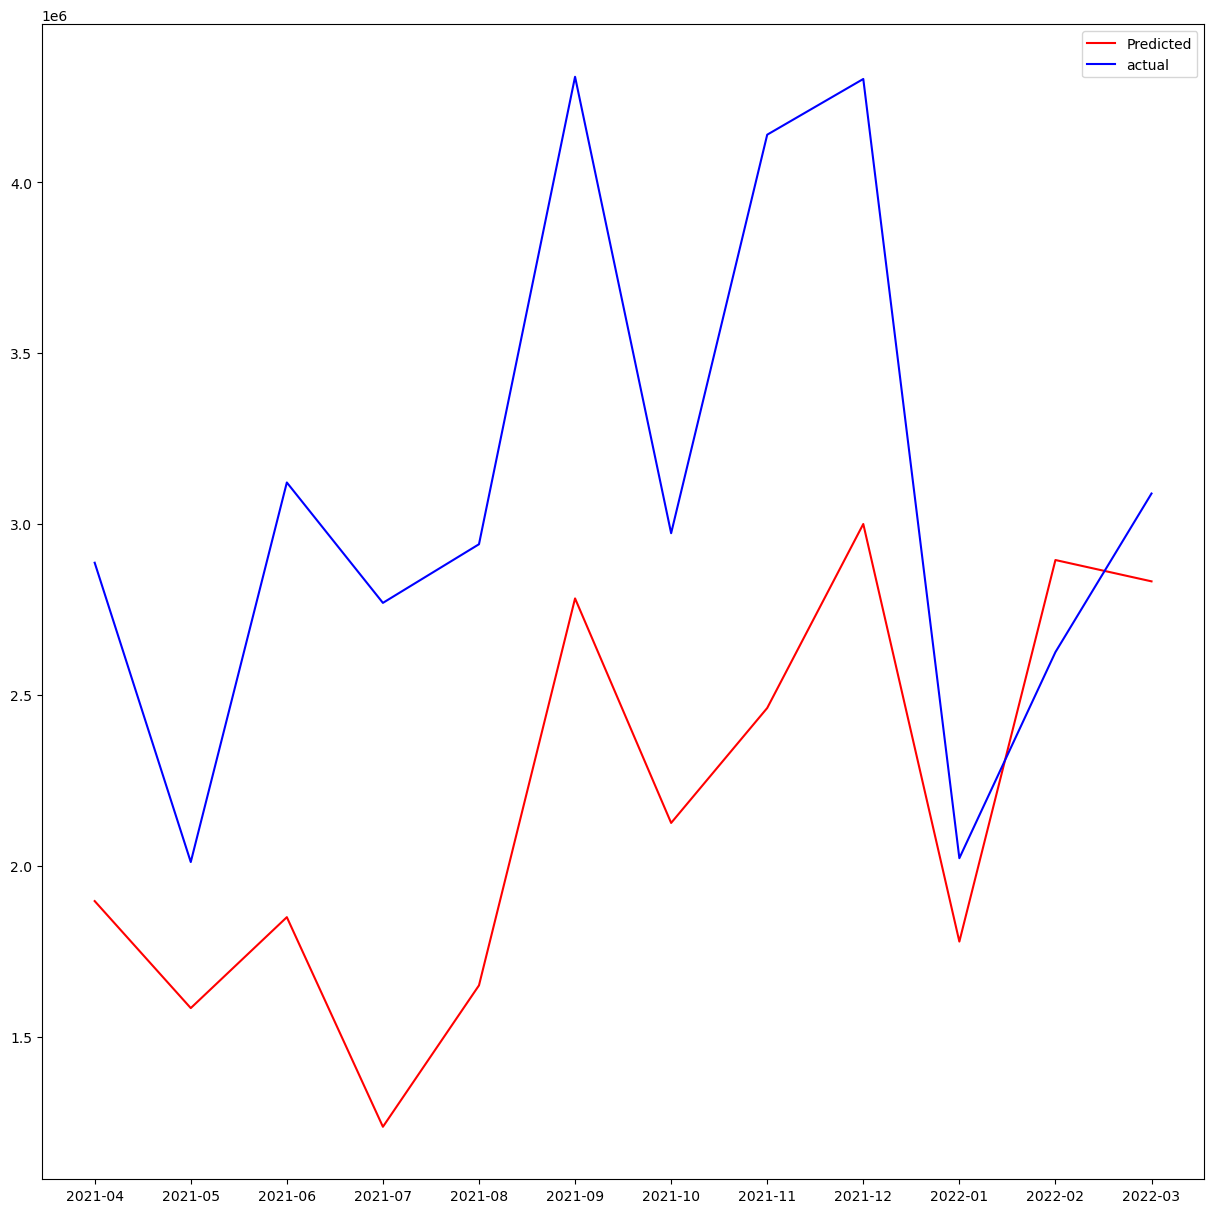

In [17]:
plt.figure(figsize = (15,15))
plt.plot(time[-12:],NIS[-12:],color = 'red',label = 'Predicted')
plt.plot(time[-12:],NIS_tst,color = 'blue',label = 'actual')
plt.legend()

In [18]:
DATA = pd.DataFrame()
DATA['time'] = time[-12:] 
DATA['Actual'] = NIS_tst[-12:]
DATA['Predicted'] = NIS[-12:]
print(DATA)
DATA.to_csv('RDT_12_LSTM_f3.csv')

       time     Actual  Predicted
0   2021-04  2886619.0  1896571.0
1   2021-05  2010817.0  1583433.0
2   2021-06  3121418.0  1849473.0
3   2021-07  2769137.0  1236133.0
4   2021-08  2940707.0  1649912.0
5   2021-09  4308562.0  2782172.0
6   2021-10  2972978.0  2125211.0
7   2021-11  4139098.0  2461500.0
8   2021-12  4302113.0  2999943.0
9   2022-01  2022050.0  1778049.0
10  2022-02  2625073.0  2894535.0
11  2022-03  3089112.0  2832108.0


<AxesSubplot:>

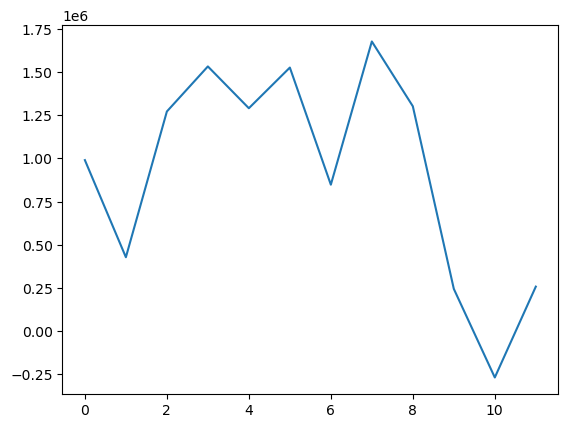

In [19]:
DATA['error'] = DATA['Actual'] - DATA['Predicted']
DATA['error']
DATA['error'].plot(kind = 'line')


In [20]:
mape = np.mean(np.abs((DATA['Actual'] - DATA['Predicted']) / DATA['Actual'])) * 100
mape

30.079030385044742